# Rat OGD VAMPIRE Data Analysis

Teng-Jui Lin

21 May 2022

Objective: Analyze data obtained from VAMPIRE analysis for rat OGD model.

## Import VAMPIRE analysis data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import vampire as vp
from sklearn import manifold

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
vp.plot.set_plot_style()

In [2]:
output_path = r'C:\Files\github-projects\nance-lab-data\microfiber\result\result-2022-05-20-rat-ogd'
model_path = os.path.join(output_path, 'model_otsu_(50_5_32)__otsu.pickle')
vampire_model = vp.util.read_pickle(model_path)
property_path = os.path.join(output_path, 'apply-properties_otsu_on_otsu_(50_5_32)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)

## Data processing

### Label experimental metadata

In [3]:
apply_properties_df.head()

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,distance_to_centroid
0,4-50-10_40x_cortex_1_otsu_thresh.tif,0,1,15.287546,435.902930,546,151.331998,43.249832,20.983343,0.874422,0.733871,0.445714,"[[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...",0.299599,2.061151,"[1.27894089508469, 1.1456402142149331, 1.22286...",0,0.649145
1,4-50-10_40x_cortex_1_otsu_thresh.tif,0,2,10.072993,326.744526,137,52.870058,18.821565,10.968044,0.812660,0.796512,0.619910,"[[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...",0.615901,1.716037,"[1.2105649636463365, 1.169584766265315, 1.2661...",0,0.944191
2,4-50-10_40x_cortex_1_otsu_thresh.tif,0,3,17.034161,173.686335,322,80.390873,21.623979,20.497617,0.318534,0.851852,0.559028,"[[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...",0.626112,1.054951,"[1.0070992333054543, 0.8511732667483881, 0.732...",1,0.713021
3,4-50-10_40x_cortex_1_otsu_thresh.tif,0,4,14.797945,359.595890,292,121.396970,35.454355,19.406167,0.836900,0.534799,0.421356,"[[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...",0.248987,1.826963,"[1.4177535446865557, 1.1815271564991154, 1.056...",3,0.855888
4,4-50-10_40x_cortex_1_otsu_thresh.tif,0,5,16.157895,294.768421,95,38.970563,13.720758,9.320021,0.733894,0.887850,0.659722,"[[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...",0.786068,1.472181,"[1.1107822170796608, 1.0716873569624206, 1.010...",0,0.878832


In [4]:
def label_df(properties_df, id_df, target_props, search_prop='filename'):
    """
    properties_df : DataFrame
        Contains "filename" column
    id_df : DataFrame
        Contains columns listed in `properties` and "regex" column.
    target_props : list
        List of property(s) to be added. Must match column name in `id_df`.
    """
    properties_df = properties_df.copy()
    properties_df[target_props] = np.nan
    for i in range(id_df['regex'].size):
        mask = properties_df[search_prop].astype(str).str.contains(id_df['regex'][i])
        properties_df.loc[mask, target_props] = id_df.iloc[i, :][target_props].values
    return properties_df

In [5]:
slice_id_df = pd.read_excel(r'C:\Files\github-projects\nance-lab-data\microfiber\1-rat-ogd-data-labels\rat-ogd-slice-labels.xlsx')
slice_id_df['regex'] = slice_id_df['slice_id'] + '_'
slice_id_df.head()

,slice_id,treatment,regex
0,4-50-4,Normal Control,4-50-4_
1,4-50-7,Normal Control,4-50-7_
2,4-50-10,Normal Control,4-50-10_
3,4-50-15,Normal Control,4-50-15_
4,4-56-1,OGD 0.5h,4-56-1_


In [6]:
region_id_df = pd.read_excel(r'C:\Files\github-projects\nance-lab-data\microfiber\1-rat-ogd-data-labels\rat-ogd-region-labels.xlsx')
region_id_df.head()

,id,region,regex
0,cortex,Cortex,cortex
1,thalamus,Thalamus,thalamus
2,hippocampus,Hippocampus,hippocampus


In [7]:
threshold_id_df = pd.read_excel(r'C:\Files\github-projects\nance-lab-data\microfiber\1-rat-ogd-data-labels\rat-ogd-threshold-labels.xlsx')
threshold_id_df.head()

,id,threshold,regex
0,otsu,Otsu,otsu
1,yen,Yen,yen


In [8]:
apply_properties_df = label_df(apply_properties_df, slice_id_df, ['slice_id', 'treatment'])
apply_properties_df = label_df(apply_properties_df, region_id_df, ['region'])
apply_properties_df = label_df(apply_properties_df, threshold_id_df, ['threshold'])
vp.util.write_pickle(os.path.join(output_path, 'labeled-apply-properties_otsu_on_otsu_(50_5_32)__.pickle'), apply_properties_df)
apply_properties_df

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,...,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,distance_to_centroid,slice_id,treatment,region,threshold
0,4-50-10_40x_cortex_1_otsu_thresh.tif,0,1,15.287546,435.902930,546,151.331998,43.249832,20.983343,0.874422,...,"[[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...",0.299599,2.061151,"[1.27894089508469, 1.1456402142149331, 1.22286...",0,0.649145,4-50-10,Normal Control,Cortex,Otsu
1,4-50-10_40x_cortex_1_otsu_thresh.tif,0,2,10.072993,326.744526,137,52.870058,18.821565,10.968044,0.812660,...,"[[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...",0.615901,1.716037,"[1.2105649636463365, 1.169584766265315, 1.2661...",0,0.944191,4-50-10,Normal Control,Cortex,Otsu
2,4-50-10_40x_cortex_1_otsu_thresh.tif,0,3,17.034161,173.686335,322,80.390873,21.623979,20.497617,0.318534,...,"[[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...",0.626112,1.054951,"[1.0070992333054543, 0.8511732667483881, 0.732...",1,0.713021,4-50-10,Normal Control,Cortex,Otsu
3,4-50-10_40x_cortex_1_otsu_thresh.tif,0,4,14.797945,359.595890,292,121.396970,35.454355,19.406167,0.836900,...,"[[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...",0.248987,1.826963,"[1.4177535446865557, 1.1815271564991154, 1.056...",3,0.855888,4-50-10,Normal Control,Cortex,Otsu
4,4-50-10_40x_cortex_1_otsu_thresh.tif,0,5,16.157895,294.768421,95,38.970563,13.720758,9.320021,0.733894,...,"[[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...",0.786068,1.472181,"[1.1107822170796608, 1.0716873569624206, 1.010...",0,0.878832,4-50-10,Normal Control,Cortex,Otsu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37551,4-59_4_40x_thalamus_5_yen_thresh.tif,679,58,474.028037,84.548287,321,103.704581,25.784169,17.927831,0.718716,...,"[[9, 10, 10, 11, 12, 18, 19, 19, 20, 19, 20, 1...",0.375076,1.438220,"[1.1895903326014492, 1.2482444600198266, 1.150...",1,0.912908,4-59_4,OGD 0.5h + AZO,Thalamus,Yen
37552,4-59_4_40x_thalamus_5_yen_thresh.tif,679,59,473.782787,444.692623,244,69.840620,18.268459,17.689399,0.249779,...,"[[11, 12, 13, 13, 12, 13, 14, 16, 18, 18, 17, ...",0.628613,1.032735,"[1.107545285705509, 1.024107283861717, 0.89522...",1,0.451973,4-59_4,OGD 0.5h + AZO,Thalamus,Yen
37553,4-59_4_40x_thalamus_5_yen_thresh.tif,679,60,492.679487,317.794872,78,41.627417,14.753169,7.560113,0.858723,...,"[[6, 6, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 5, 3, 4,...",0.565647,1.951448,"[1.2832947798545489, 1.1955866840075398, 0.991...",4,1.010485,4-59_4,OGD 0.5h + AZO,Thalamus,Yen
37554,4-59_4_40x_thalamus_5_yen_thresh.tif,679,61,497.462500,377.925000,80,49.213203,12.533468,9.838682,0.619505,...,"[[3, 4, 5, 6, 7, 6, 7, 8, 9, 10, 10, 9, 10, 10...",0.415085,1.273897,"[1.1383785619374307, 0.8732066787041668, 0.884...",1,0.943339,4-59_4,OGD 0.5h + AZO,Thalamus,Yen


### Label cluster coloring

In [9]:
from matplotlib.colors import to_hex
color_id_df = pd.DataFrame({
    'cluster_id': [0, 1, 2, 3, 4],
    'color': [to_hex(plt.get_cmap('twilight')(np.linspace(0.1, 0.9, 5))[i]) for i in range(5)],
})
color_id_df['regex'] = color_id_df['cluster_id'].astype(str)

In [10]:
label_colors = label_df(apply_properties_df, color_id_df, ['color'], 'cluster_id').color.values
label_colors

array(['#a6bfca', '#a6bfca', '#5f58b0', ..., '#d0b39e', '#5f58b0',
       '#9f3c50'], dtype=object)

## Visualization of data

### Number of microglia in each group

<AxesSubplot:>

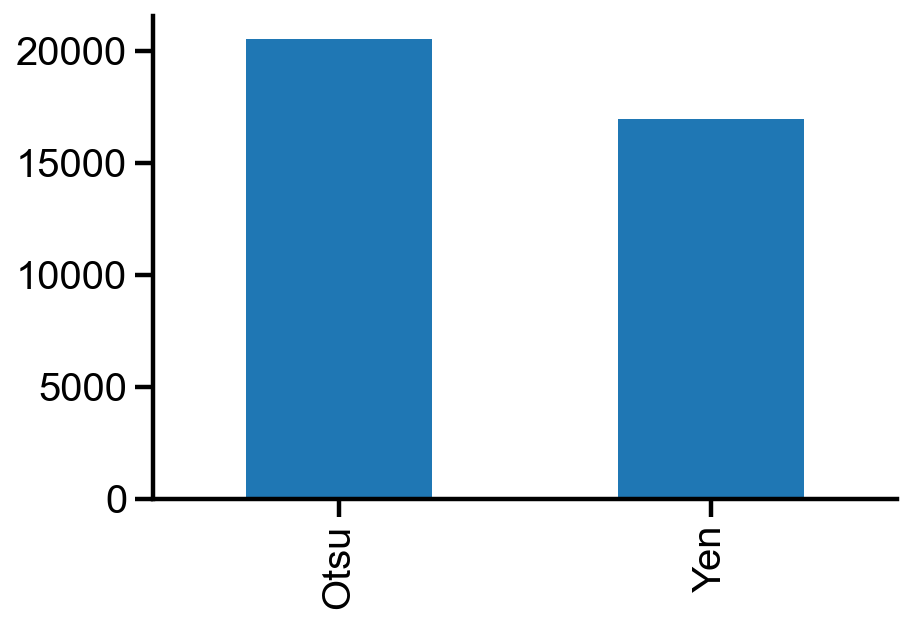

In [11]:
apply_properties_df['threshold'].value_counts().plot(kind='bar')

In [12]:
otsu_properties_df = apply_properties_df[apply_properties_df['threshold'] == 'Otsu']

<AxesSubplot:>

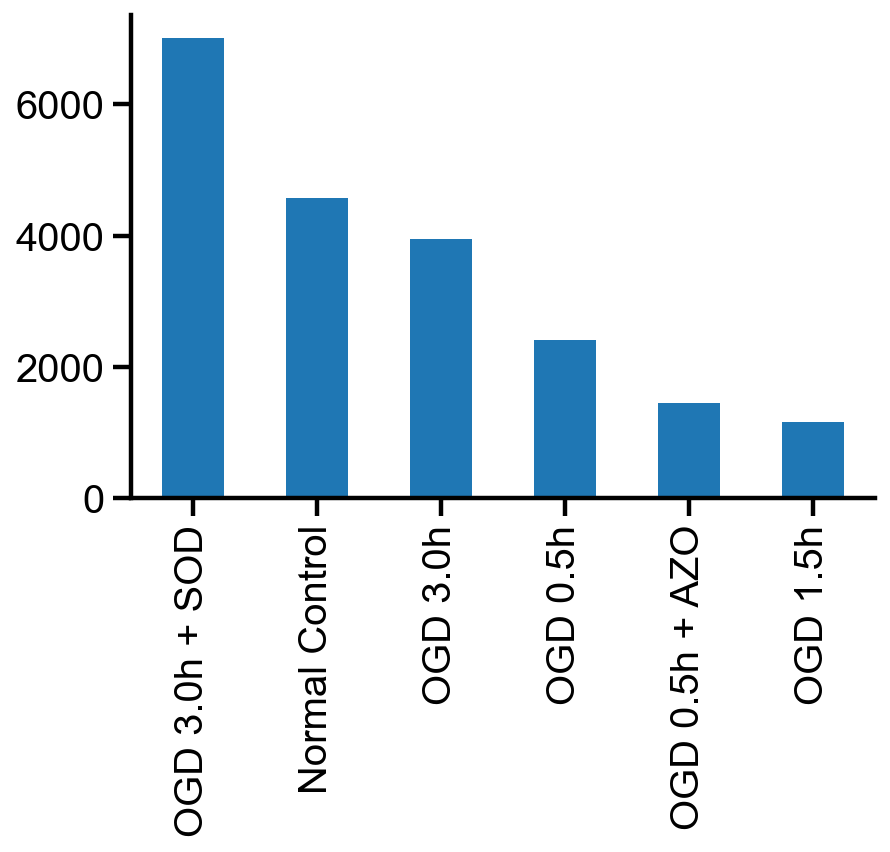

In [13]:
otsu_properties_df['treatment'].value_counts().plot(kind='bar')

<AxesSubplot:>

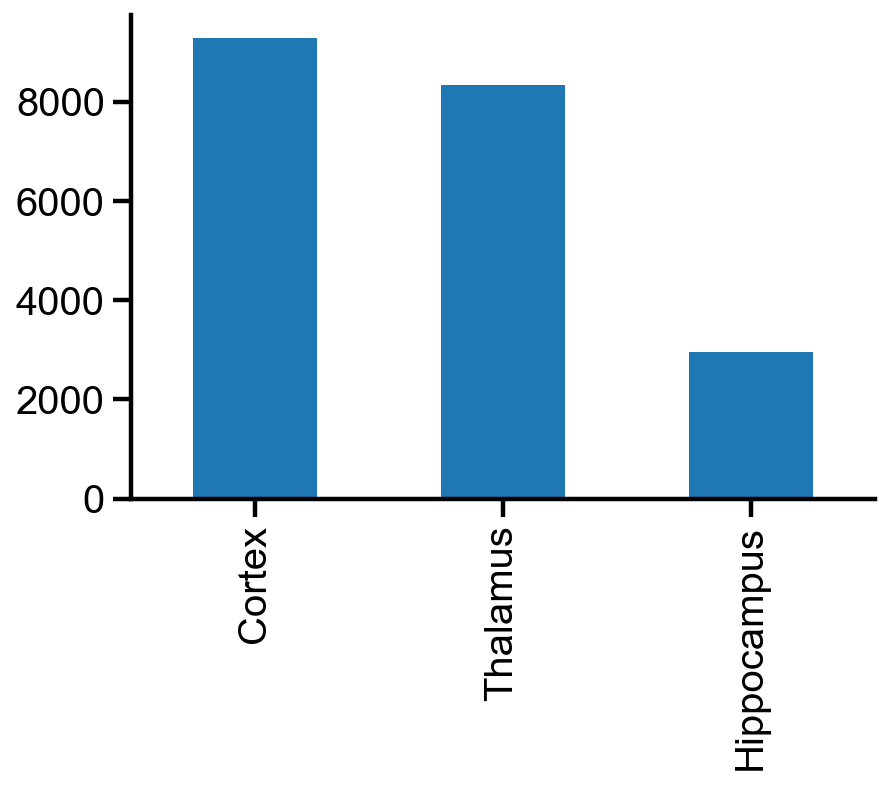

In [14]:
otsu_properties_df['region'].value_counts().plot(kind='bar')

<AxesSubplot:>

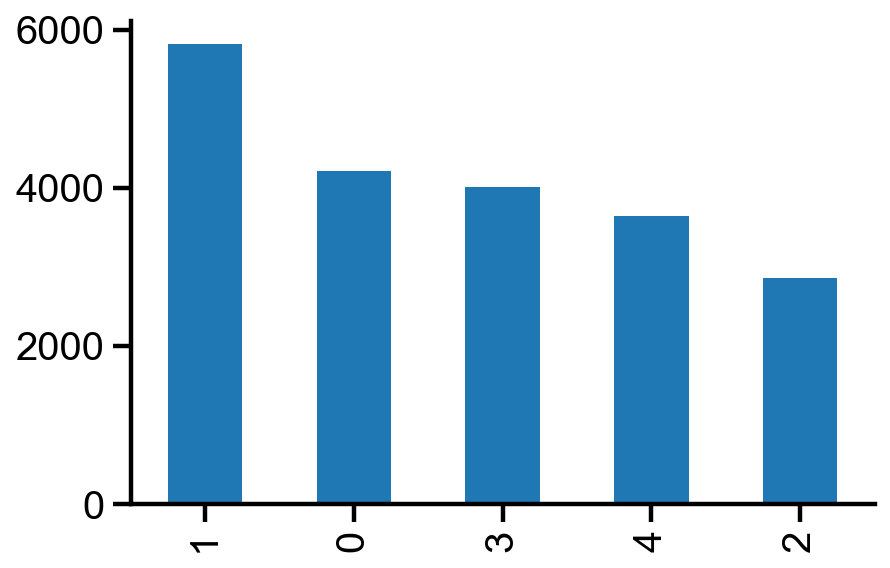

In [15]:
otsu_properties_df['cluster_id'].value_counts().plot(kind='bar')  # shape mode distribution

### Creating DataFrames for GraphPad Prism Visualization

The resulting DataFrames are saved into csv that can be imported to GraphPad Prism for statistical analysis and visualization.

#### Categorical scatterplot of (morphological parameter) vs. (category)

In [16]:
properties = ['area', 'perimeter', 'circularity', 'aspect_ratio', 'solidity', 'eccentricity', 'extent', 'distance_to_centroid']

In [17]:
def get_categorical_df(input_df, feature, category):
    """
    Create DataFrame for GraphPad Prism "column table" visualization of categorical scatter plots.
    Numerical feature vs. catagorical variable.
    
    input_df : DataFrame
        Contains `feature` and `category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    """
    category_items = np.unique(input_df[category])
    data = [input_df[(input_df[category] == i)]
            [feature].reset_index(drop=True) 
            for i in category_items]
    df = pd.concat(data, axis=1)
    df.columns = category_items
    return df

In [18]:
# categorical scatterplot of (morphological parameter) vs. (category)
# one plot for each (morphological parameter)
for prop in properties:
    get_categorical_df(otsu_properties_df, prop, 'region')

#### Categorical scatterplot of (morphological parameter) vs. (category) with (controlled category)

In [19]:
def get_controlled_categorical_dfs(input_df, feature, category, controlled_category):
    """
    Create DataFrames for GraphPad Prism "column table" visualization of grouped categorical scatter plots.
    Numerical feature vs. catagorical variable with one categorical variable controlled.
    
    input_df : DataFrame
        Contains `feature` and `category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    """
    category_items = np.unique(input_df[category])
    controlled_category_items = np.unique(input_df[controlled_category])
    dfs = []
    for controlled_category_item in controlled_category_items:
        data = [input_df[(input_df[category] == i)]
                [input_df[(input_df[category] == i)][controlled_category] == controlled_category_item]
                [feature].reset_index(drop=True) 
                for i in category_items]
        df = pd.concat(data, axis=1)
        df.columns = category_items
        dfs.append(df)
    return dfs

In [20]:
# categorical scatterplots of (morphological parameter) vs. (category) with (controlled category)
for prop in properties:
    get_controlled_categorical_dfs(otsu_properties_df, prop, 'region', 'cluster_id')

#### Heatmap of (morphological parameter) with (category) vs. (controlled category)

In [21]:
def get_heatmap_df(input_df, feature, category, controlled_category, statistics='median'):
    """
    Create DataFrame for GraphPad Prism "contingency tables" visualization of heatmap.
    Categorical variable vs. catagorical variable of heatmap of numerical feature.
    
    input_df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    statistics : str, optional
        Statistical parameter of interest. Default "median".
    """
    return pd.pivot_table(input_df.groupby(by=[category, controlled_category]).agg(statistics),
                                           values=feature,
                                           index=[category],
                                           columns=[controlled_category])

In [22]:
get_heatmap_df(otsu_properties_df, prop, 'region', 'cluster_id')

cluster_id,0,1,2,3,4
region,,,,,
Cortex,0.777895,0.723836,0.900801,0.811526,0.828658
Hippocampus,0.779574,0.793839,0.888037,0.811473,0.815205
Thalamus,0.773833,0.731160,0.891390,0.805884,0.823520


The resulting DataFrame can be used for heatmap visualization in both GraphPad Prism and Python. Here, we demonstrate visualization using Python.

### Population trend of morphological parameters

#### Treatment vs. cluster

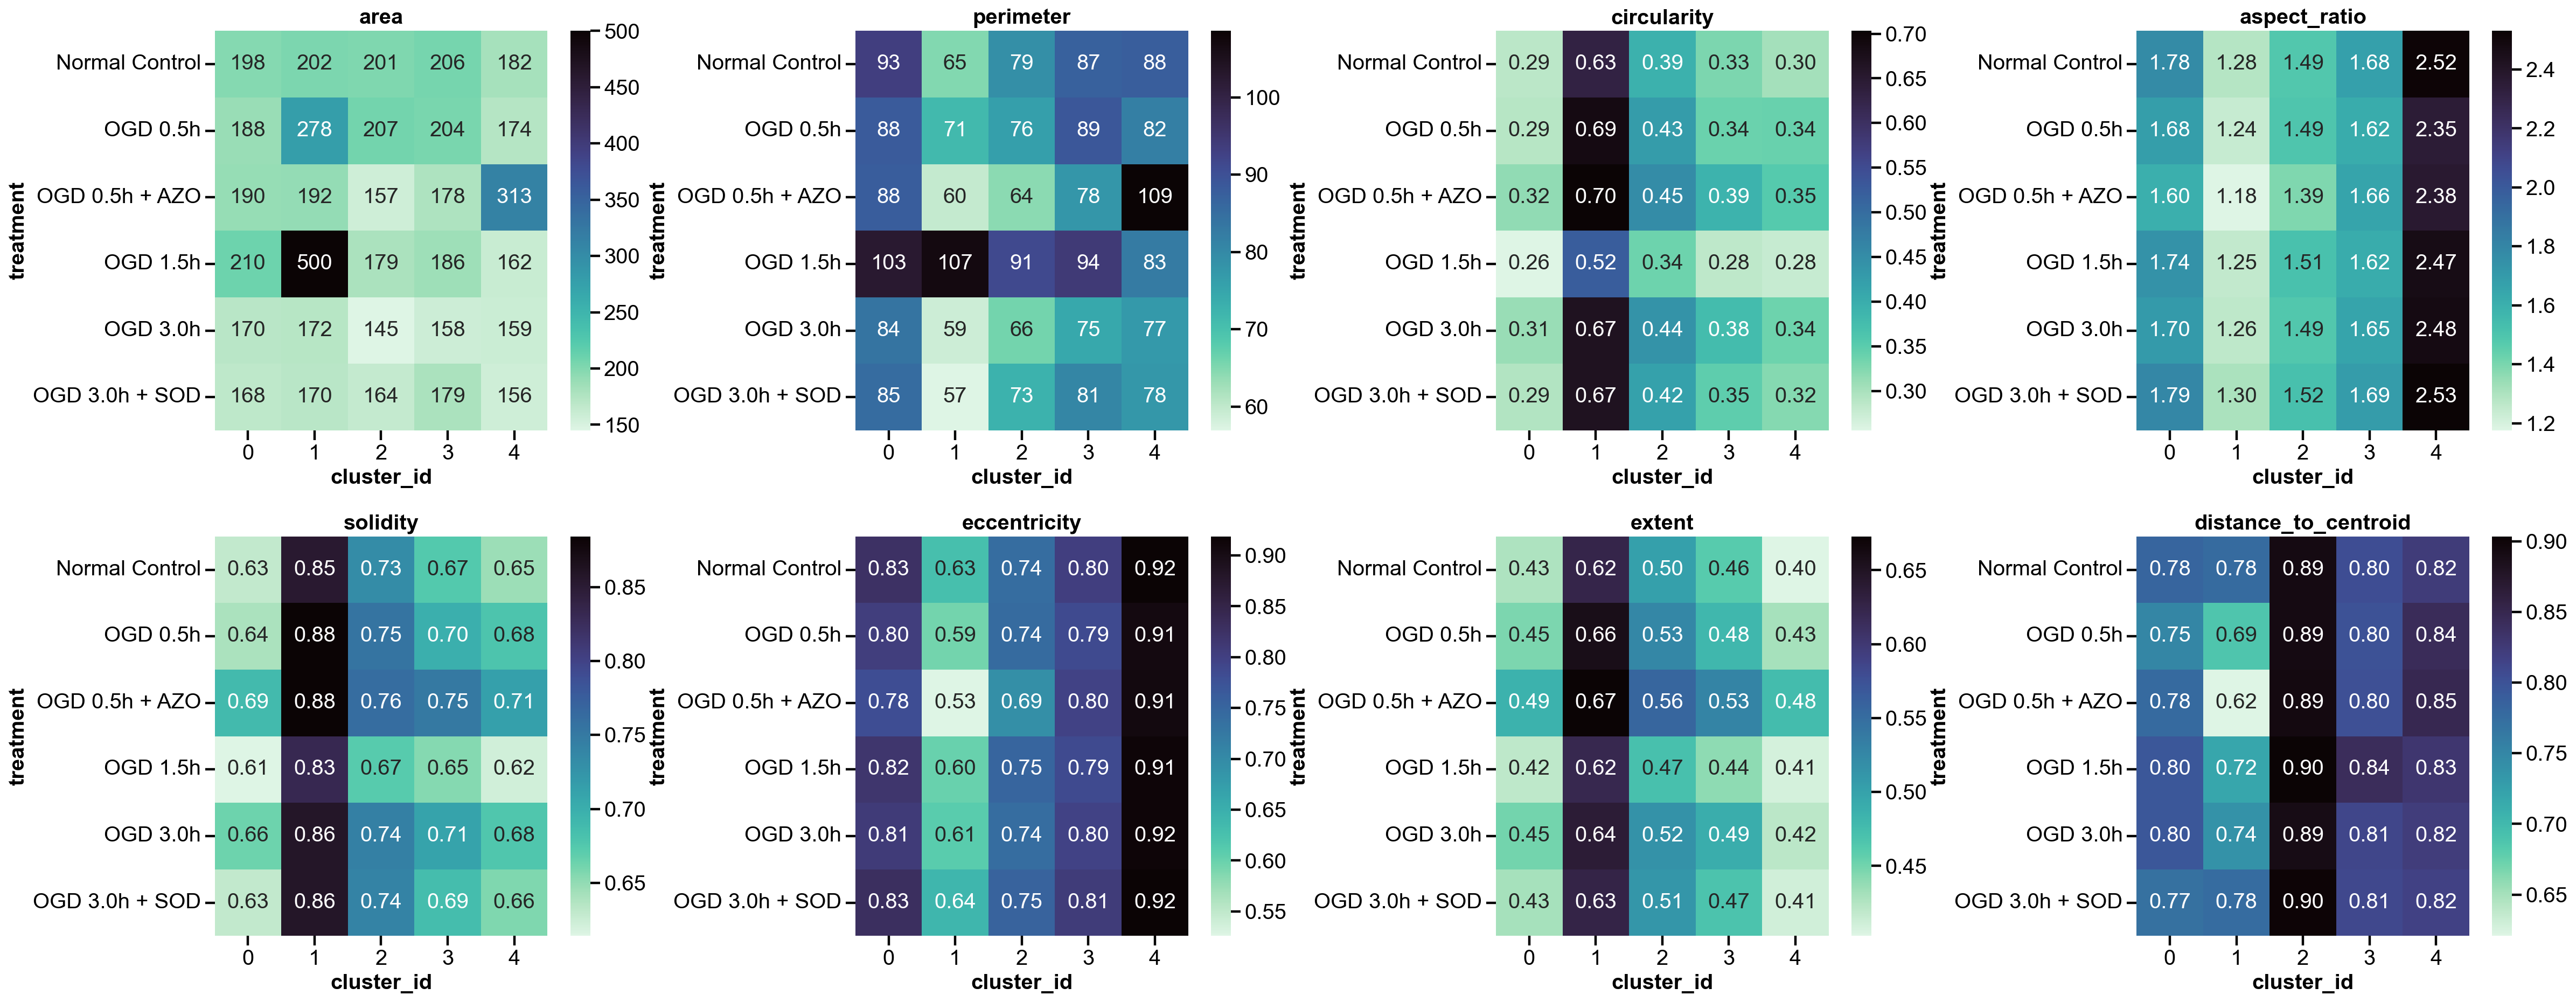

In [23]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col+1)*scale, row*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            heatmap_df = get_heatmap_df(otsu_properties_df, properties[i], 'treatment', 'cluster_id')
            if heatmap_df.max().max() > 10:
                fmt = '.0f'
            else:
                fmt = '.2f'
                
            sns.heatmap(heatmap_df,
                        square=True,
                        annot=True,
                        fmt=fmt,
                        ax=axs[row_i, col_i],
                        cmap='mako_r')
            axs[row_i, col_i].set_title(properties[i])
plt.tight_layout()

#### Region vs. cluster

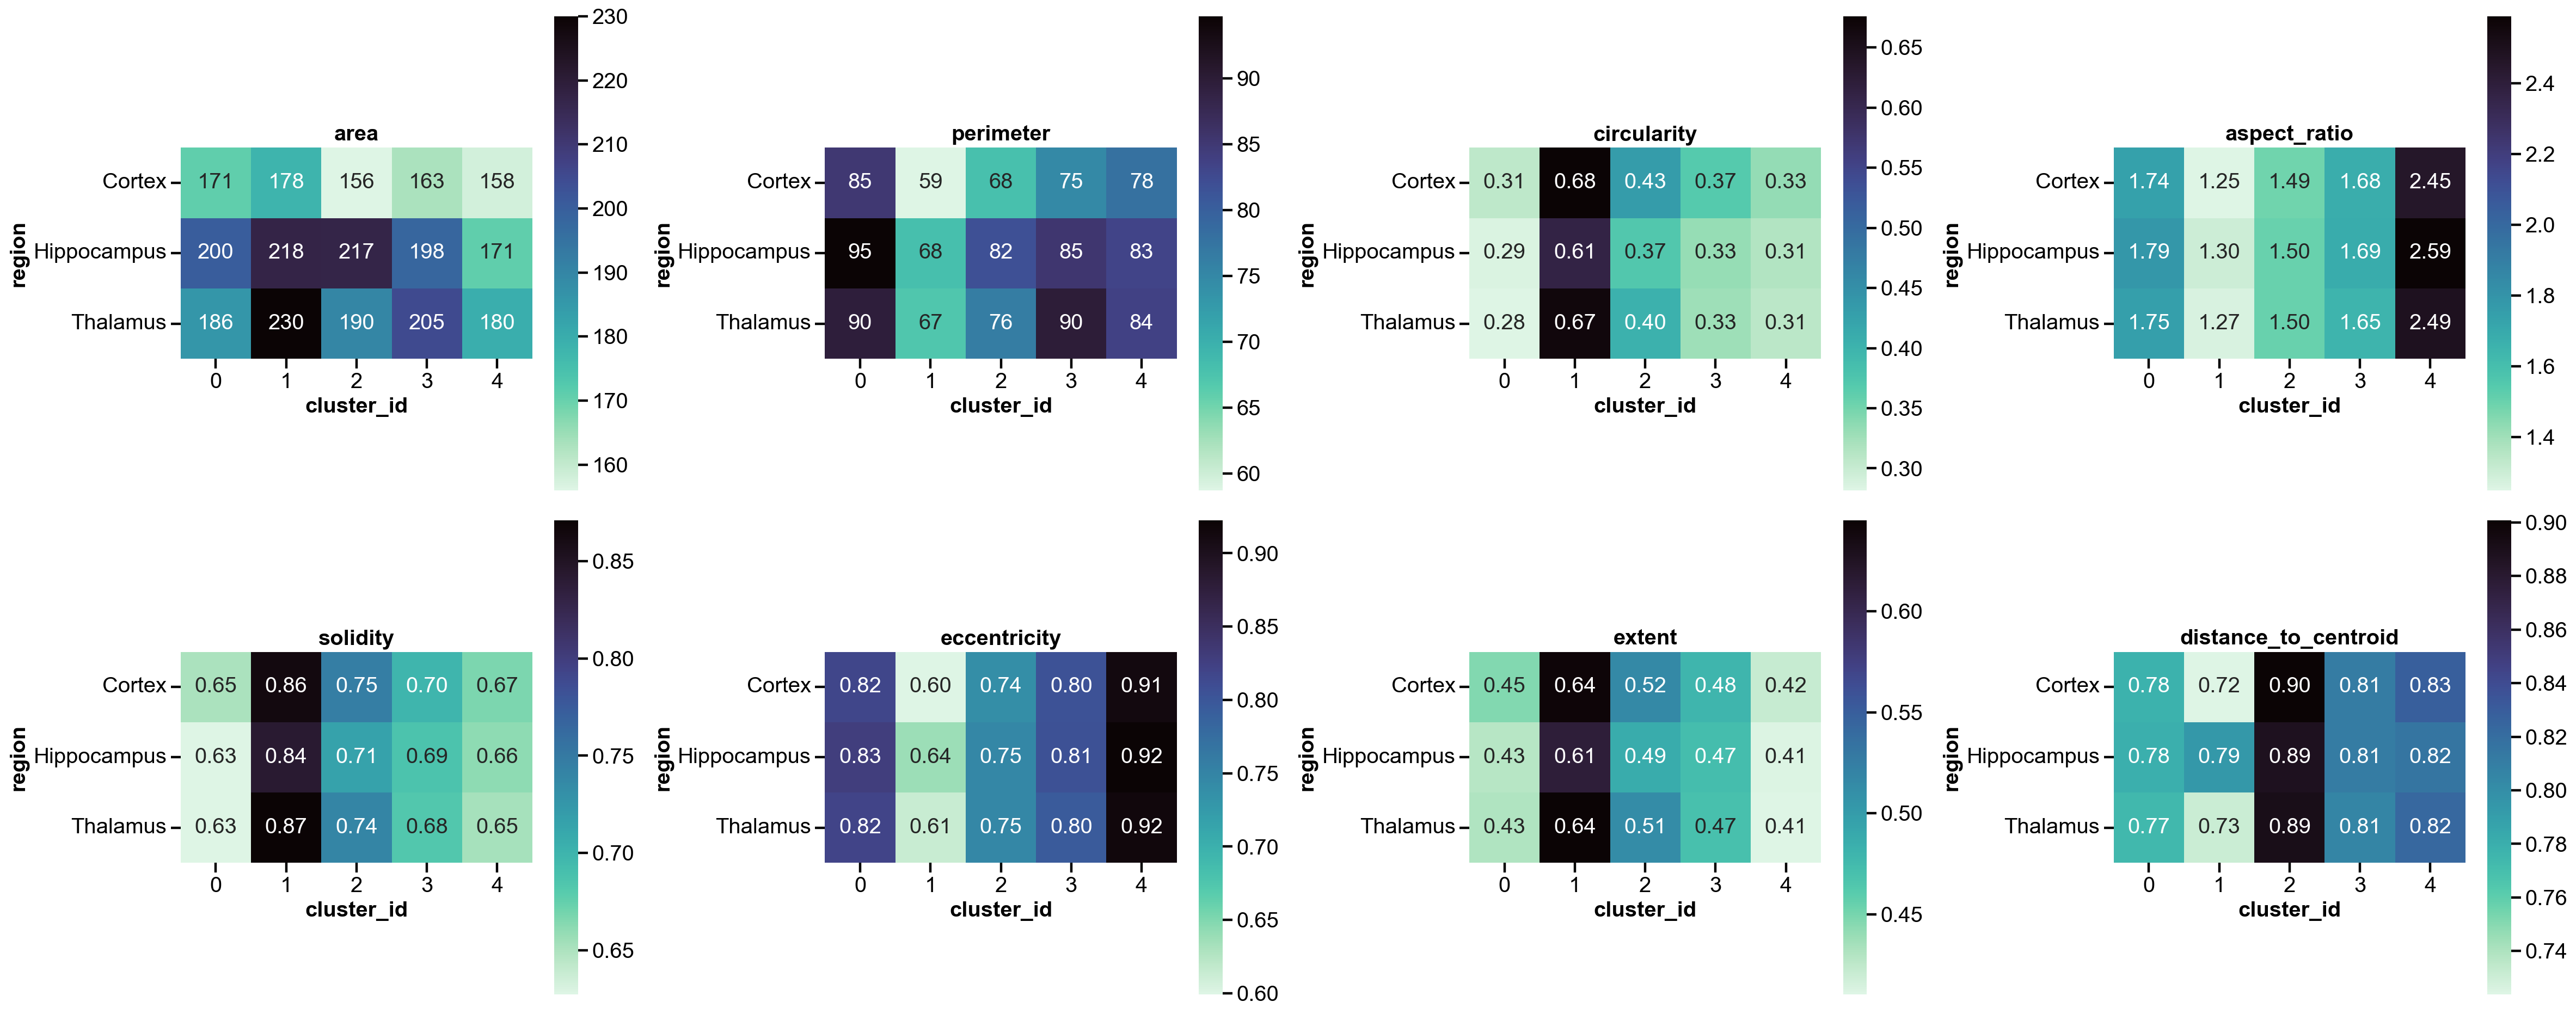

In [24]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col+1)*scale, row*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            heatmap_df = get_heatmap_df(otsu_properties_df, properties[i], 'region', 'cluster_id')
            if heatmap_df.max().max() > 10:
                fmt = '.0f'
            else:
                fmt = '.2f'
                
            sns.heatmap(heatmap_df,
                        square=True,
                        annot=True,
                        fmt=fmt,
                        ax=axs[row_i, col_i],
                        cmap='mako_r')
            axs[row_i, col_i].set_title(properties[i])
plt.tight_layout()

#### Treatment vs. region

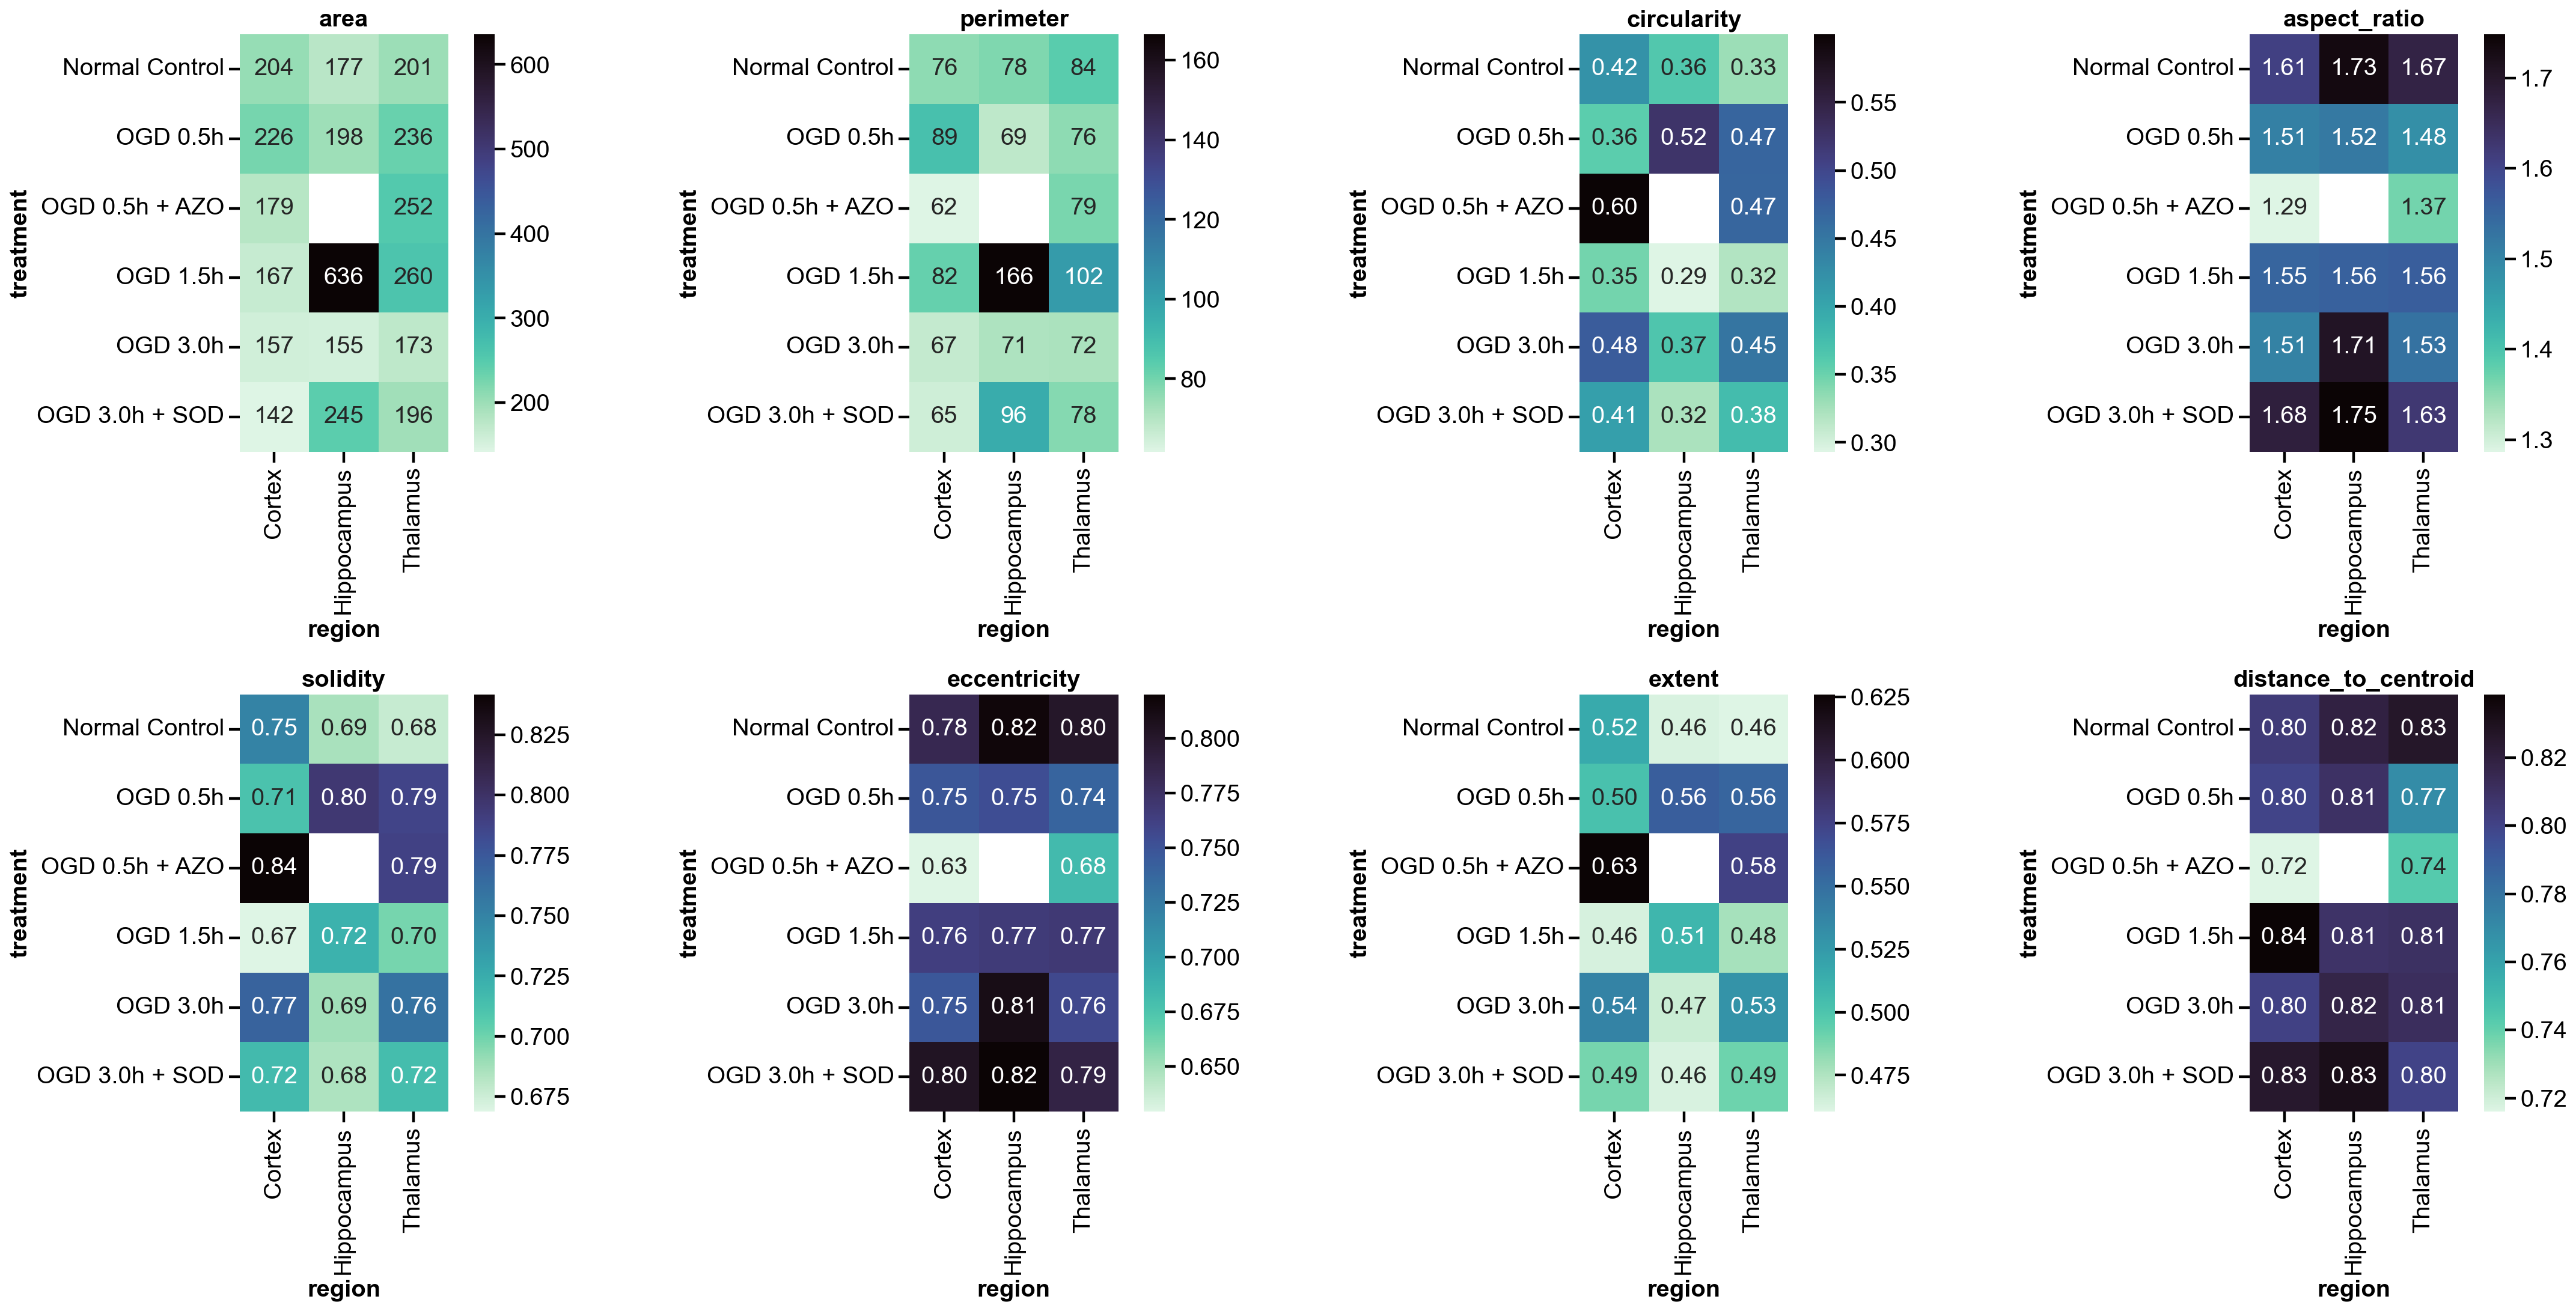

In [41]:
col = 4
row = 2
scale = 7

fig, axs = plt.subplots(row, col, figsize=(col*scale, row*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            heatmap_df = get_heatmap_df(otsu_properties_df, properties[i], 'treatment', 'region')
            if heatmap_df.max().max() > 10:
                fmt = '.0f'
            else:
                fmt = '.2f'
                
            sns.heatmap(heatmap_df,
                        square=True,
                        annot=True,
                        fmt=fmt,
                        ax=axs[row_i, col_i],
                        cmap='mako_r')
            axs[row_i, col_i].set_title(properties[i])
plt.tight_layout()

### Changes of morphological parameters

#### Functions for plotting changes

In [26]:
def compute_arrow(df, feature, category, category_item,
                  controlled_category, init_controlled_category, final_controlled_category):
    """
    Calculate the initial y value of arrow and the length of the arrow.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    category_item : str
        Name of category item for arrow comparison. 
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    final_controlled_category : str
        Name of controlled category to be compared to baseline.
    """
    cluster_cond = df[category] == category_item
    treatment_cond = df[controlled_category] == init_controlled_category
    init_value = df[cluster_cond & treatment_cond][feature].values[0]
    cluster_cond = df[category] == category_item
    treatment_cond = df[controlled_category] == final_controlled_category
    final_value = df[cluster_cond & treatment_cond][feature].values[0]
    difference = final_value - init_value
    return init_value, difference

In [27]:
def plot_arrow(df, feature, category, controlled_category, init_controlled_category, final_controlled_category, ax, displace=1, facecolor='black'):
    """
    Plot an arrow from initial value to final value for all categories in x-axis.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    final_controlled_category : str
        Name of controlled category to be compared to baseline.
    ax : matplotlib.axes.Axes
    displace : int
        Horizontal displacement of arrow from the original plot. Default 1.
    facecolor : str
        Facecolor of arrow.
    """
    category_items = np.unique(df[category])
    head_langth = 0.03 * np.diff(ax.get_ylim())[0]  # scale the arrow head length
    for i, category_item in enumerate(category_items):
        init, diff = compute_arrow(df=df,
                                   feature=feature, 
                                   category=category, 
                                   category_item=category_item,
                                   controlled_category=controlled_category, 
                                   init_controlled_category=init_controlled_category, 
                                   final_controlled_category=final_controlled_category)
        if abs(diff) >= head_langth:  # does not show small changes
            ax.arrow(i+0.15*displace, 
                     init,
                     0, 
                     diff, 
                     length_includes_head=True, 
                     width=0.03, 
                     head_width=0.1, 
                     head_length=head_langth,
                     facecolor=facecolor, 
                     edgecolor='none')

In [28]:
def plot_baseline_arrows(df, feature, category, controlled_category, init_controlled_category, ax, cmap=plt.get_cmap("tab10")):
    """
    Plot arrows from a baseline initial value to final values of different 
    controlled categories for all categories in x-axis.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    ax : matplotlib.axes.Axes
    cmap : plt.get_cmap()
    """
    controlled_category_items = np.unique(df[controlled_category])
    for j, controlled_category_item in enumerate(controlled_category_items):
        plot_arrow(df=df, 
                   feature=feature, 
                   category=category, 
                   controlled_category=controlled_category, 
                   init_controlled_category=init_controlled_category, 
                   final_controlled_category=controlled_category_item, 
                   ax=ax, 
                   displace=j, 
                   facecolor=cmap(j))

In [29]:
def plot_basline_change(df, feature, category, controlled_category, init_controlled_category, ax, cmap=plt.get_cmap("tab10")):
    """
    Plots changes of numerical feature in response to one categorical variable
    while holding another categorical variable constant for all categories
    compared to a baseline.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_category : str
        Name of controlled category set as baseline.
    ax : matplotlib.axes.Axes
    cmap : plt.get_cmap()
    """
    sns.stripplot(x=category, 
                  y=feature, 
                  hue=controlled_category,  
                  data=df, 
                  jitter=False, 
                  marker='o', 
                  ax=ax)
    plot_baseline_arrows(df=df, 
                         feature=feature, 
                         category=category, 
                         controlled_category=controlled_category, 
                         init_controlled_category=init_controlled_category, 
                         ax=ax, 
                         cmap=cmap)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [30]:
def plot_change(df, feature, category, controlled_category, init_controlled_categories, final_controlled_categories, facecolors, ax):
    """
    Plots changes of numerical feature in response to one categorical variable
    while holding another categorical variable constant for
    `init_controlled_categories` compared to `final_controlled_categories`.
    
    Parameters
    ----------
    df : DataFrame
        Contains `feature`, `category`, and `controlled_category` columns.
    feature : str
        Name of numerical column to be used on y-axis.
    category : str
        Name of categorical column to be used on x-axis.
    controlled_category : str
        Name of controlled categorical column to be used for subplots.
    init_controlled_categories : list
        Names of controlled category set as baseline.
    final_controlled_categories : list
        Names of controlled category compared to baseline.
    facecolors : list
        Names of facecolors of arrows.
    ax : matplotlib.axes.Axes
    
    Raises
    ------
    ValueError
        If `init_controlled_categories`, `final_controlled_categories`, 
        and `facecolors` does not have the same length.
    """
    if not len(init_controlled_categories) == len(final_controlled_categories) == len(facecolors):
        raise ValueError('`init_controlled_categories`, `final_controlled_categories`, and `facecolors` does not have the same length.')
    sns.stripplot(x=category, 
                  y=feature, 
                  hue=controlled_category,  
                  data=df, 
                  jitter=False, 
                  marker='o', 
                  ax=ax)
    for i in range(len(init_controlled_categories)):
        plot_arrow(df=df, 
                   feature=feature, 
                   category=category, 
                   controlled_category=controlled_category, 
                   init_controlled_category=init_controlled_categories[i], 
                   final_controlled_category=final_controlled_categories[i],
                   displace=i+1,
                   ax=ax, 
                   facecolor=facecolors[i])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Variation in regions

In [31]:
region_df = otsu_properties_df.groupby(by=['region', 'cluster_id']).agg('median').reset_index()
region_df.head()

,region,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid
0,Cortex,0,178.0,46.0,308.984134,332.922856,171.0,85.080213,24.287414,13.789196,0.817685,0.650851,0.446624,0.306503,1.737119,0.777895
1,Cortex,1,219.0,46.0,284.553333,293.992221,178.0,58.734019,17.459030,13.905840,0.599311,0.863442,0.642544,0.675997,1.249194,0.723836
2,Cortex,2,178.0,47.5,320.564246,327.293318,156.0,67.941125,19.460664,12.937077,0.739400,0.745369,0.515356,0.431854,1.485296,0.900801
3,Cortex,3,178.0,46.5,297.360845,325.296768,163.0,74.834524,21.860664,13.094486,0.803853,0.698891,0.479774,0.368149,1.681158,0.811526
4,Cortex,4,178.0,52.5,333.750827,349.220944,158.0,77.905592,27.088945,10.501467,0.913276,0.666667,0.421717,0.333522,2.454949,0.828658


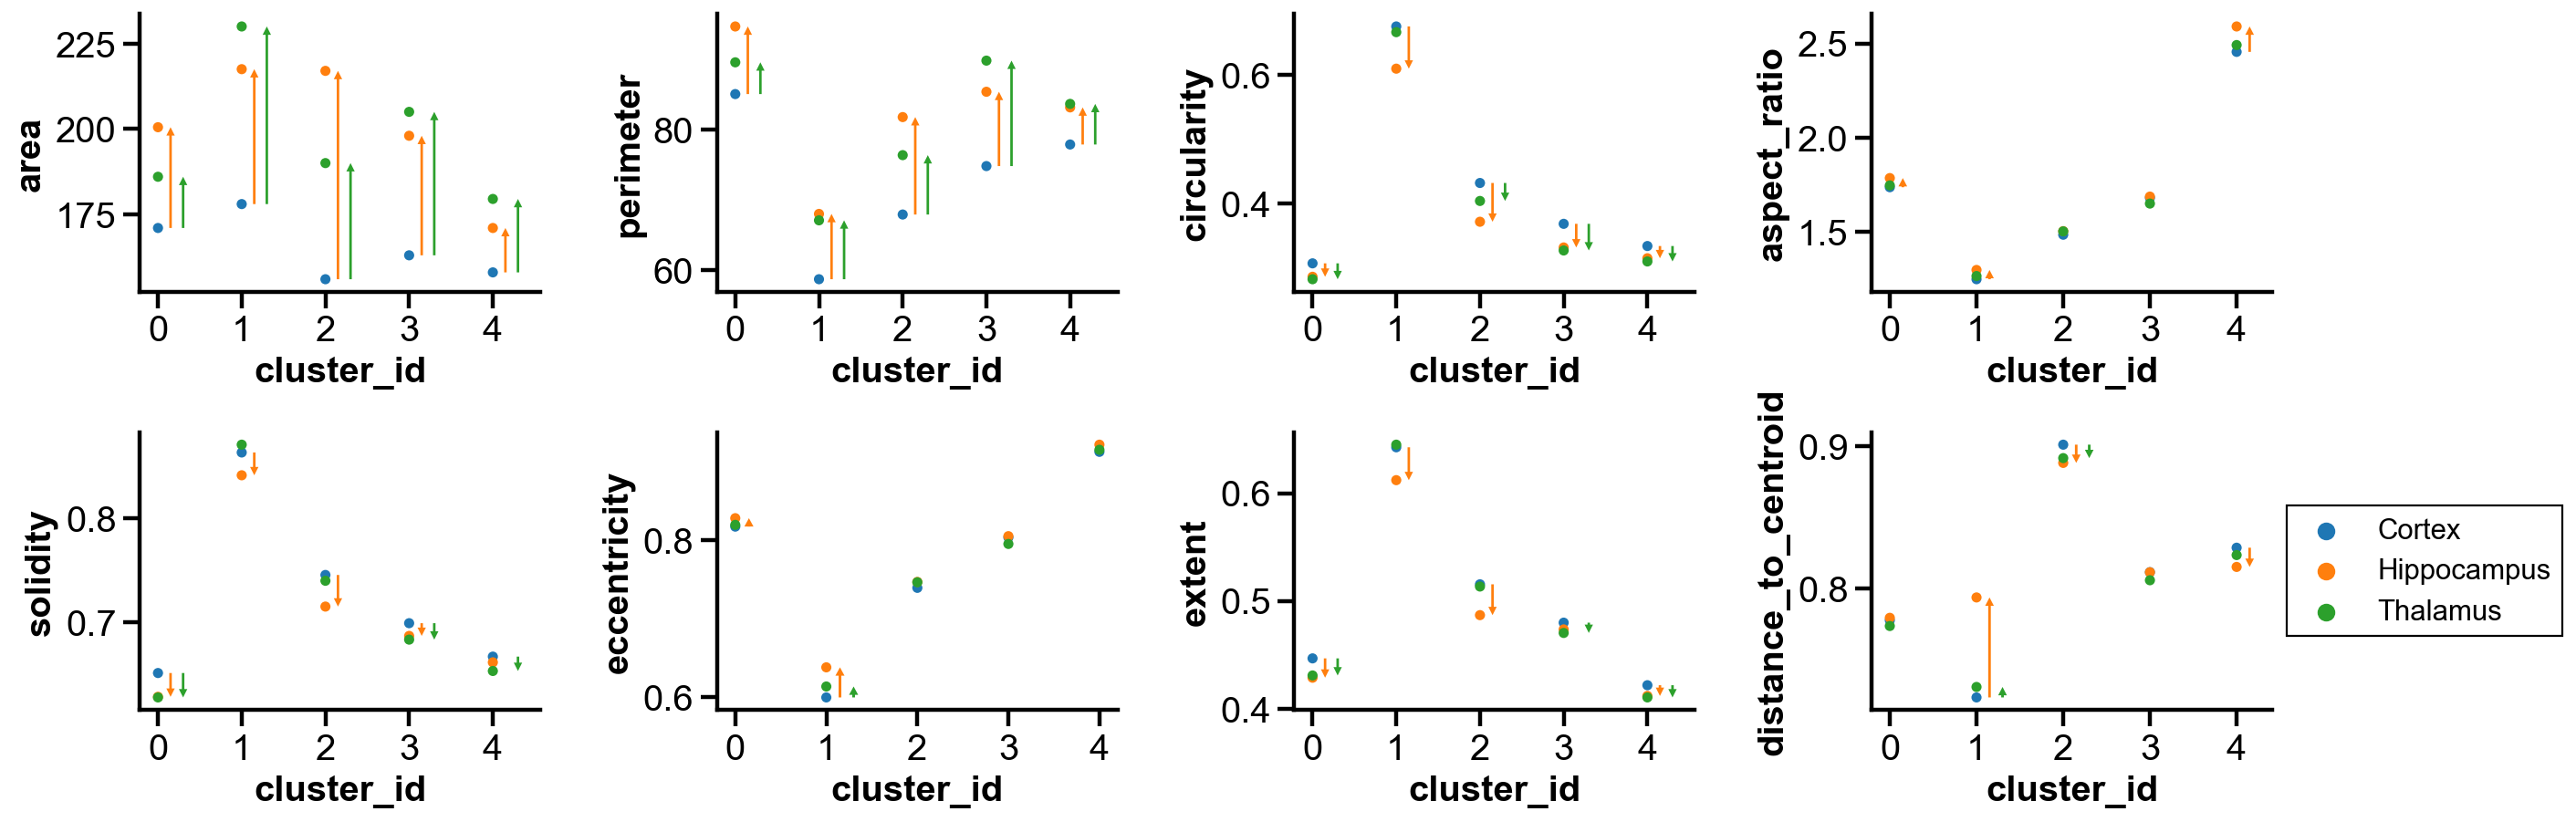

In [32]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_basline_change(df=region_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='region', 
                        init_controlled_category='Cortex', 
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

#### Changes in response to injury

In [33]:
injury_df = otsu_properties_df.groupby(by=['treatment', 'cluster_id']).agg('median').reset_index()
injury_cond = (~injury_df['treatment'].isin(['OGD 0.5h + AZO', 'OGD 3.0h + SOD']))
injury_df = injury_df[injury_cond]
injury_df.head()

,treatment,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid
0,Normal Control,0,146.0,49.0,265.227105,260.472323,198.0,93.426407,26.155761,14.964083,0.826276,0.629258,0.427193,0.287162,1.775362,0.782082
1,Normal Control,1,134.0,54.0,256.340909,253.104348,202.0,64.870058,19.239834,14.744875,0.627219,0.852535,0.624561,0.630933,1.283956,0.777232
2,Normal Control,2,142.0,49.0,252.876404,262.033019,201.0,79.083261,22.064574,14.933877,0.740322,0.732919,0.502193,0.394799,1.487536,0.893315
3,Normal Control,3,148.0,52.0,262.482480,260.296000,206.0,87.319805,24.597289,14.865193,0.802699,0.674797,0.461039,0.328283,1.676771,0.804375
4,Normal Control,4,150.0,49.0,266.104167,251.595960,182.0,87.669048,29.531506,11.353362,0.918184,0.646018,0.402703,0.304361,2.524269,0.823526


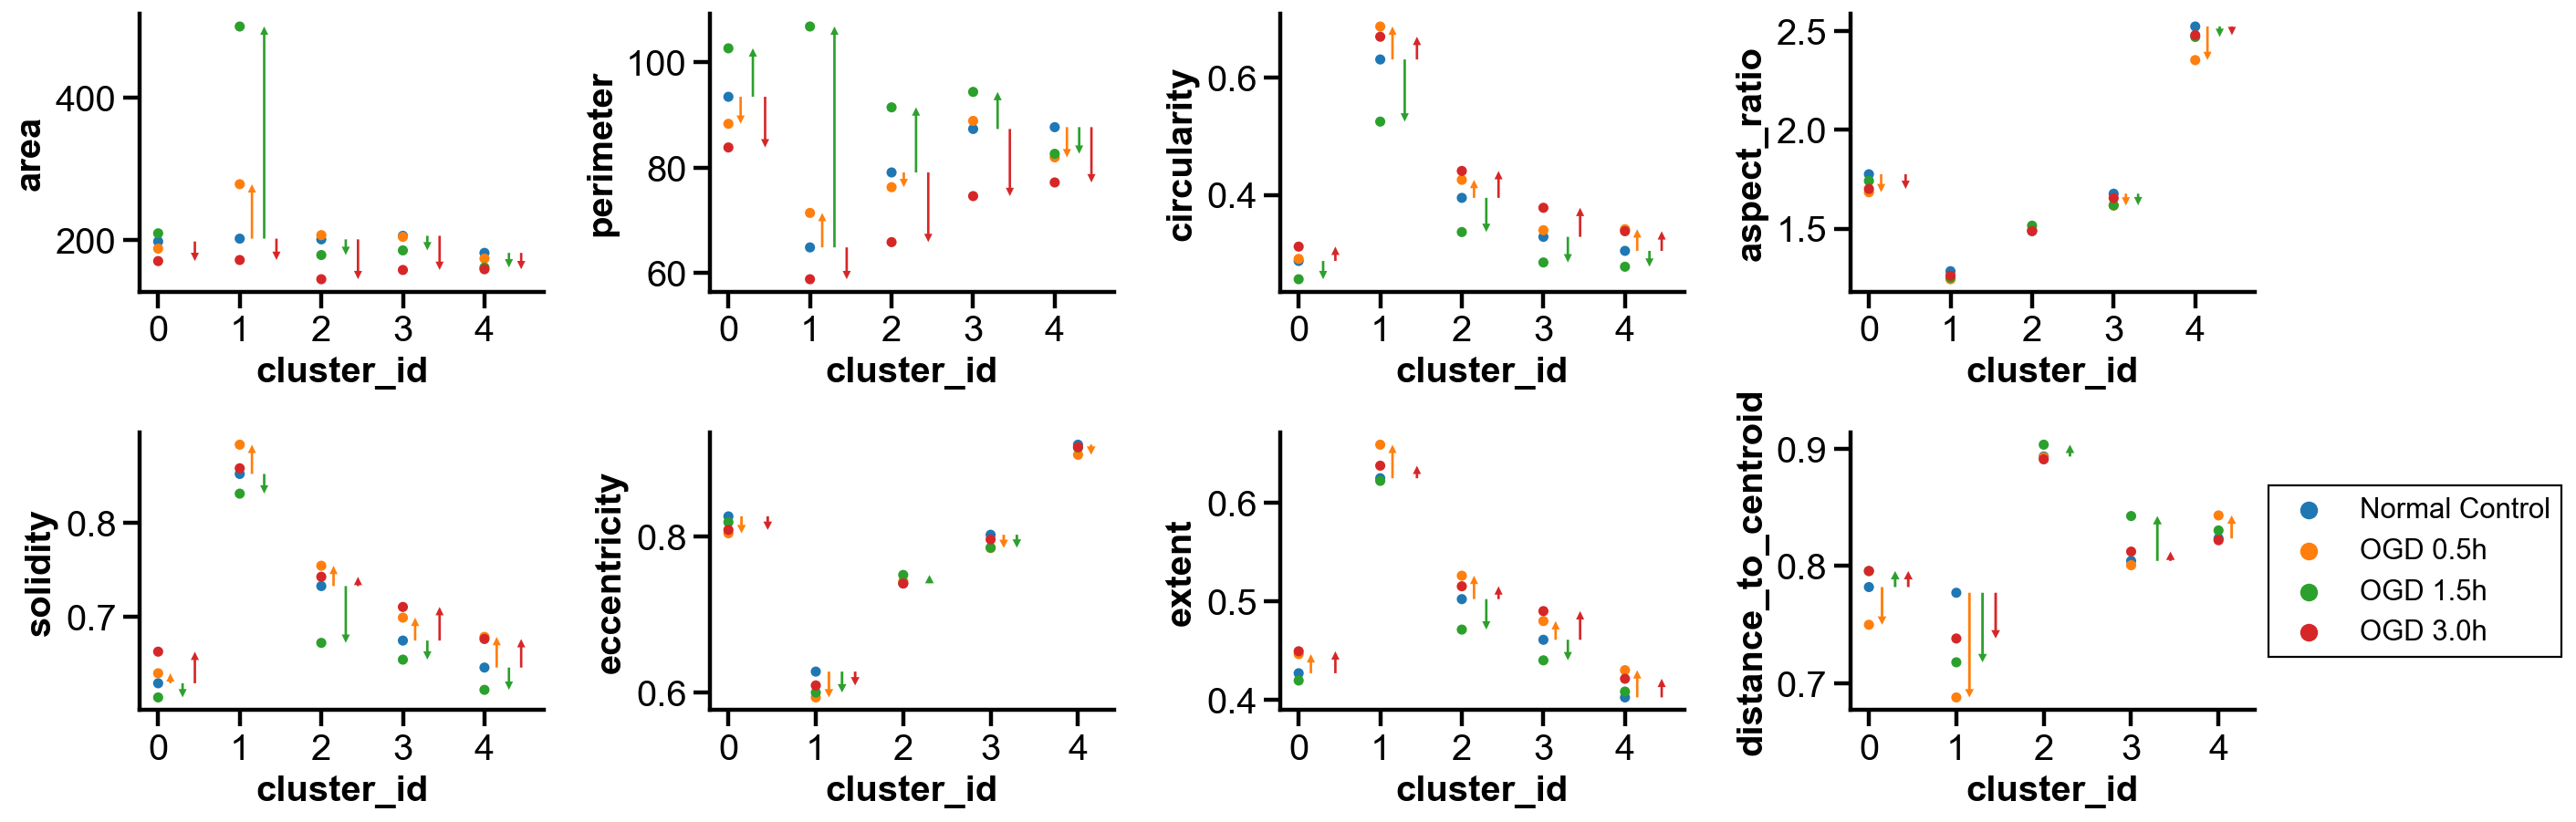

In [34]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_basline_change(df=injury_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='treatment', 
                        init_controlled_category='Normal Control', 
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

#### Changes of OGD 0.5h in response to AZO treatemnt

In [35]:
azo_treatment_df = otsu_properties_df.groupby(by=['treatment', 'cluster_id']).agg('median').reset_index()
azo_treatment_cond = (azo_treatment_df['treatment'].isin(['Normal Control', 'OGD 0.5h', 'OGD 0.5h + AZO']))
azo_treatment_df = azo_treatment_df[azo_treatment_cond]
azo_treatment_df.head()

,treatment,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid
0,Normal Control,0,146.0,49.0,265.227105,260.472323,198.0,93.426407,26.155761,14.964083,0.826276,0.629258,0.427193,0.287162,1.775362,0.782082
1,Normal Control,1,134.0,54.0,256.340909,253.104348,202.0,64.870058,19.239834,14.744875,0.627219,0.852535,0.624561,0.630933,1.283956,0.777232
2,Normal Control,2,142.0,49.0,252.876404,262.033019,201.0,79.083261,22.064574,14.933877,0.740322,0.732919,0.502193,0.394799,1.487536,0.893315
3,Normal Control,3,148.0,52.0,262.482480,260.296000,206.0,87.319805,24.597289,14.865193,0.802699,0.674797,0.461039,0.328283,1.676771,0.804375
4,Normal Control,4,150.0,49.0,266.104167,251.595960,182.0,87.669048,29.531506,11.353362,0.918184,0.646018,0.402703,0.304361,2.524269,0.823526


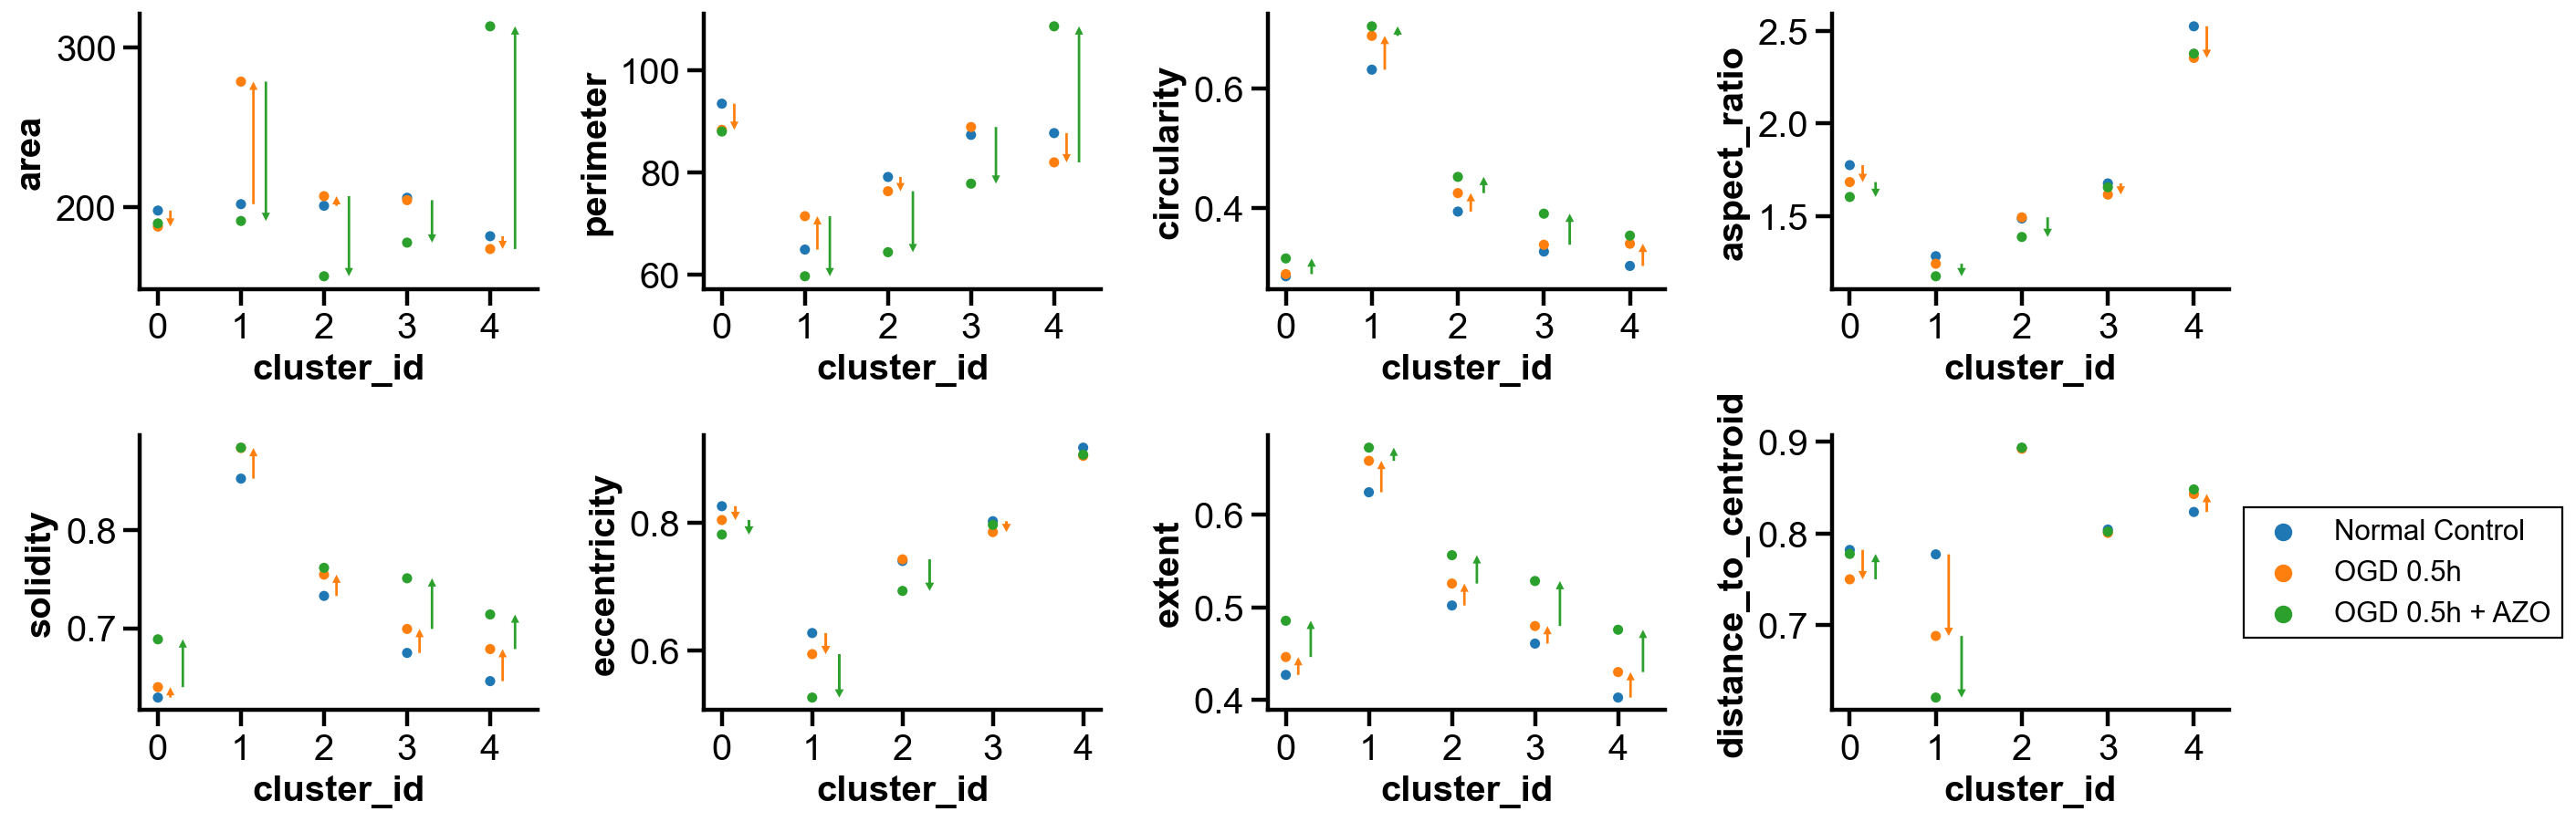

In [36]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_change(df=azo_treatment_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='treatment', 
                        init_controlled_categories=['Normal Control', 'OGD 0.5h'], 
                        final_controlled_categories=['OGD 0.5h', 'OGD 0.5h + AZO'], 
                        facecolors=['tab:orange', 'tab:green'],
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

#### Changes of OGD 3.0h in response to SOD treatemnt

In [37]:
sod_treatment_df = otsu_properties_df.groupby(by=['treatment', 'cluster_id']).agg('median').reset_index()
sod_treatment_cond = (sod_treatment_df['treatment'].isin(['Normal Control', 'OGD 3.0h', 'OGD 3.0h + SOD']))
sod_treatment_df = sod_treatment_df[sod_treatment_cond]
sod_treatment_df.head()

,treatment,cluster_id,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,circularity,aspect_ratio,distance_to_centroid
0,Normal Control,0,146.0,49.0,265.227105,260.472323,198.0,93.426407,26.155761,14.964083,0.826276,0.629258,0.427193,0.287162,1.775362,0.782082
1,Normal Control,1,134.0,54.0,256.340909,253.104348,202.0,64.870058,19.239834,14.744875,0.627219,0.852535,0.624561,0.630933,1.283956,0.777232
2,Normal Control,2,142.0,49.0,252.876404,262.033019,201.0,79.083261,22.064574,14.933877,0.740322,0.732919,0.502193,0.394799,1.487536,0.893315
3,Normal Control,3,148.0,52.0,262.482480,260.296000,206.0,87.319805,24.597289,14.865193,0.802699,0.674797,0.461039,0.328283,1.676771,0.804375
4,Normal Control,4,150.0,49.0,266.104167,251.595960,182.0,87.669048,29.531506,11.353362,0.918184,0.646018,0.402703,0.304361,2.524269,0.823526


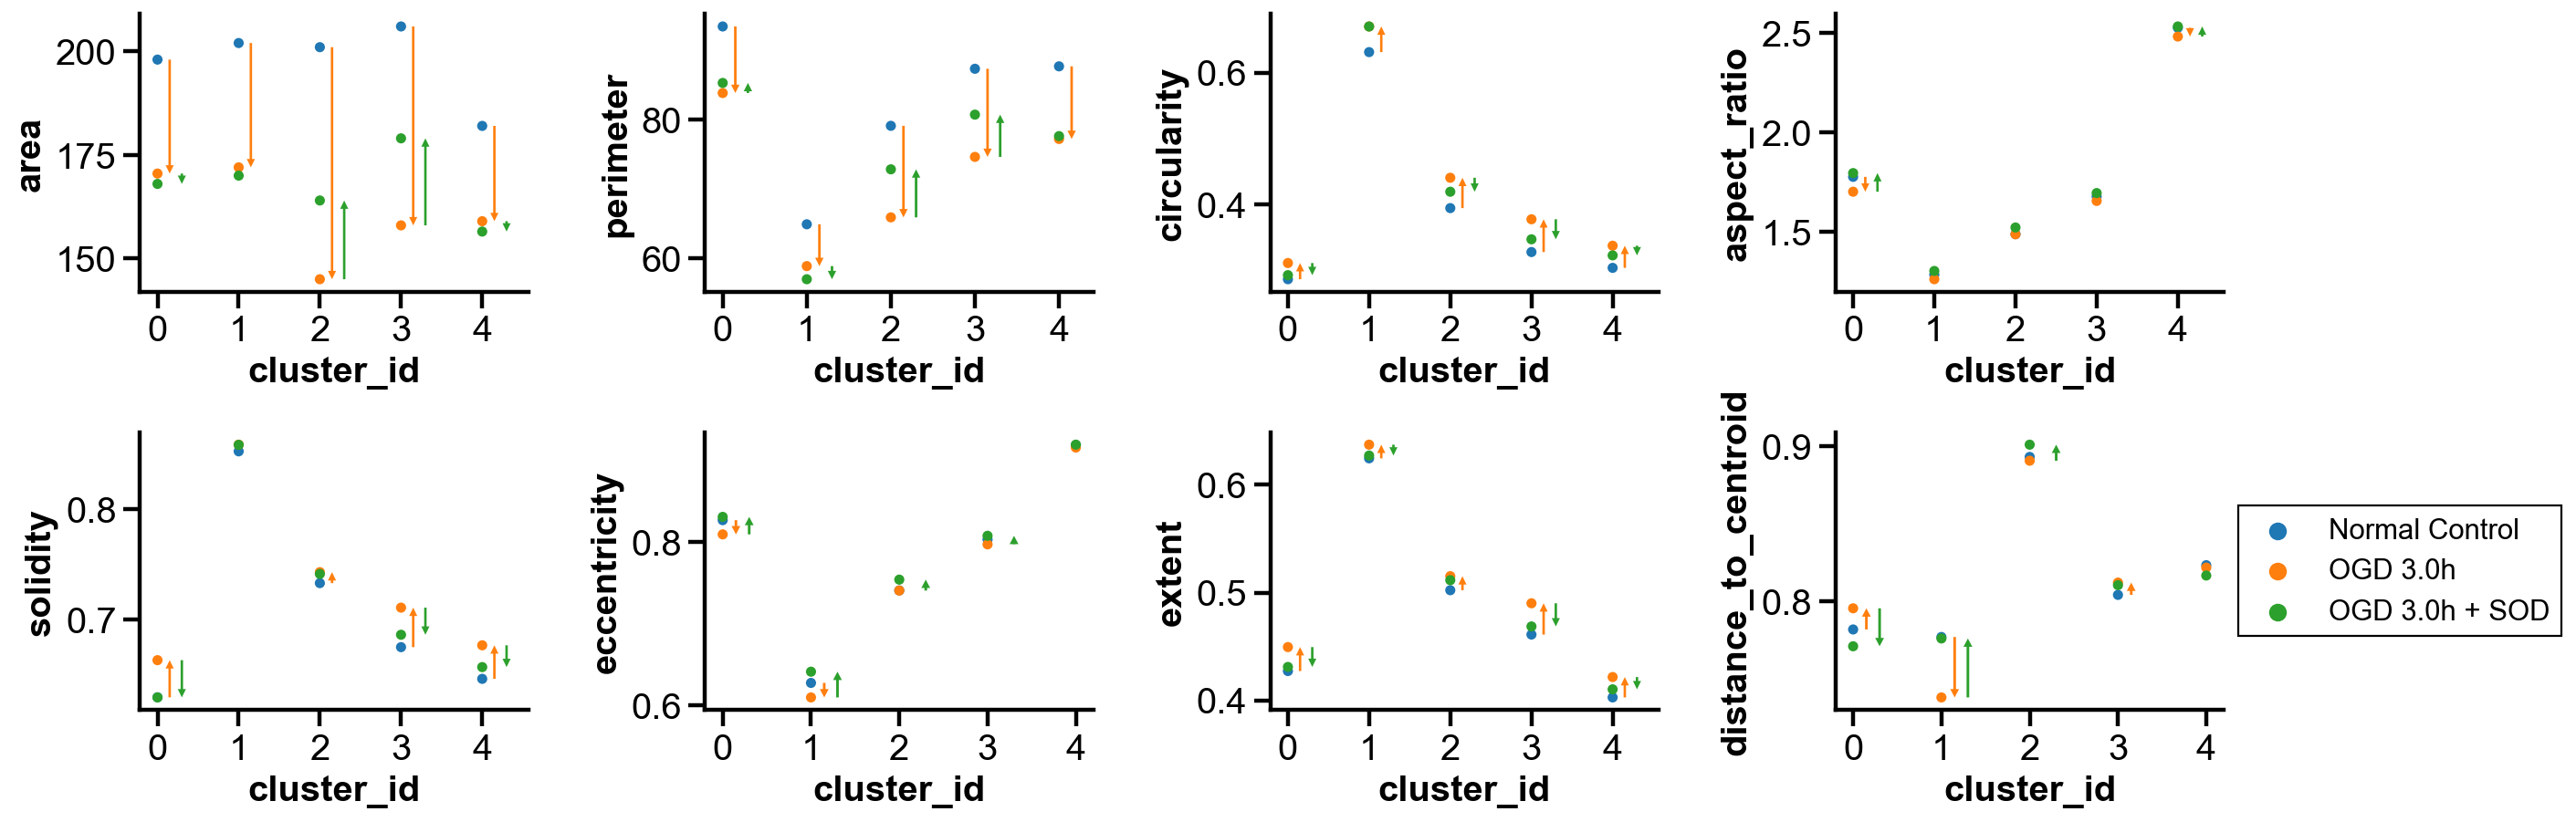

In [38]:
col = 4
row = 2
scale = 6

fig, axs = plt.subplots(row, col, figsize=((col-1)*scale, (row-1)*scale))
for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        if i < len(properties):
            plot_change(df=sod_treatment_df, 
                        feature=properties[i], 
                        category='cluster_id', 
                        controlled_category='treatment', 
                        init_controlled_categories=['Normal Control', 'OGD 3.0h'], 
                        final_controlled_categories=['OGD 3.0h', 'OGD 3.0h + SOD'], 
                        facecolors=['tab:orange', 'tab:green'],
                        ax=axs[row_i, col_i])
            axs[row_i, col_i].legend().set_visible(False)
axs[-1, -1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()